In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [44]:
!pip install plotly

In [45]:
# hello

In [46]:
home_data = pd.read_csv("homicide_by_countries.csv")

In [47]:
home_data

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [48]:
home_data['Region'].replace('Americas','N/S America',inplace = True) # trying to change Americas with North and South America

In [49]:
# checking for number of rows
home_data.shape

(195, 6)

In [50]:
# checking for null values 
home_data.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [51]:
#dealing with missing data if any 
home_data.dropna(inplace=True)
# dealing with missing values if taking a specific column
home_data.dropna(subset = ['Rate'],inplace = True)

In [52]:
home_data.dtypes # checking for the data types of each column

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [53]:
home_data['Rate'] = home_data['Rate'].astype(int)

In [54]:
# still here with for loop we can also convert the data types 
My_list = ['Rate','Count',"Year"]
for i in My_list:
    print(i)
    home_data[i] = home_data[i].astype(int)

Rate
Count
Year


In [55]:
home_data1 = home_data.sort_values('Count', ascending = False)# you can also add .reset_index.drop(drop = True)

home_data1


,Location,Region,Subregion,Rate,Count,Year
26,Brazil,N/S America,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,N/S America,Central America,28,36579,2020
186,United States,N/S America,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
38,Channel Islands,Europe,Northern Europe,0,0,2010
145,Saint Helena,Africa,Western Africa,0,0,2009
151,San Marino,Europe,Southern Europe,0,0,2011


In [56]:
## extracting Location and Count sorted basing on count and taking first five by default in descening order
home_data1 = home_data[['Location','Count']].sort_values(by = 'Count',ascending = False).head()
#home_data1['perc'] = (home_data1['Count']*100 / home_data1['Count'].sum()).round(2) # this can also put them manualyy into percentage 
home_data1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


In [57]:
# showing labels  just from location
label = home_data1.Location


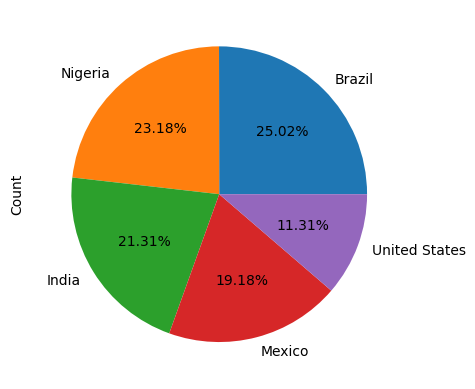

In [58]:
home_data1.plot(x = 'Location',y = 'Count' , kind = "pie", labels = home_data1.Location, autopct = '%1.2f%%') # if you want to specify ,then you can continue with kind 
#but by default some times a line graph is ploted
plt.legend().set_visible(False)# now i want to remove the legends 



In [59]:
home_data2 = home_data.groupby('Region')['Count'].sum().sort_values(ascending = False) # goruping all countries In all each continet 
home_data2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int32

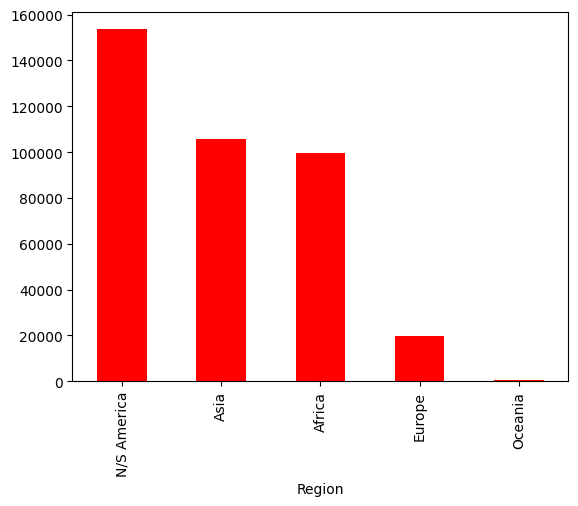

In [60]:
home_data2.plot(kind = 'bar',color = 'red')
plt.show()

In [61]:
# now taking out Subregion and after visualise it as well a
df3 = home_data.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

In [62]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [63]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

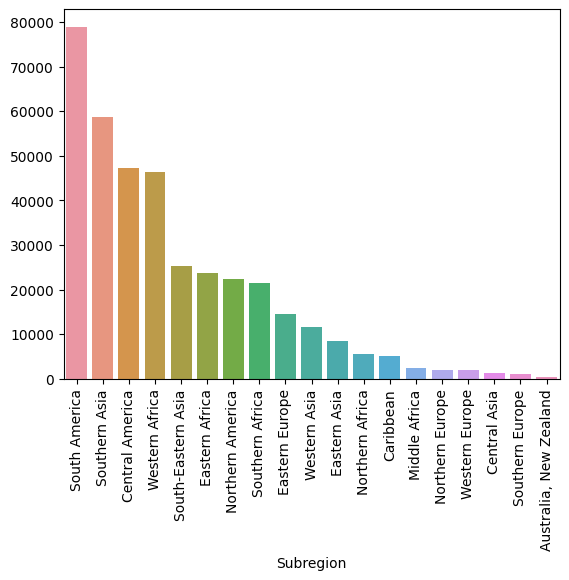

In [64]:
sns.barplot(x = df3.index , y = df3.values)
plt.xticks(rotation = "vertical")# you can also use vertical
xlabel = None

In [65]:
home_data.Year.value_counts()

2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: Year, dtype: int64

In [66]:
home_data[home_data["Region"].isin (['Asia',"Europe"])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [67]:
# you can also extract this way compared to the above method
df4 = home_data[(home_data["Region"] == 'Asia') | (home_data["Region"] == 'Europe')]
df4

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [68]:
df4 = df4[df4['Year'] > 2016][['Region','Year','Count']]

In [69]:
df4 = df4.groupby(['Region','Year']).sum()['Count']

<AxesSubplot:ylabel='Count'>

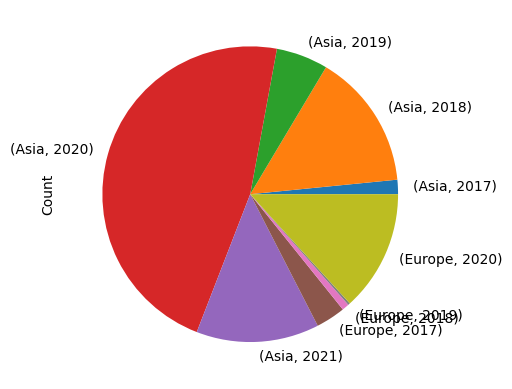

In [70]:
df4.plot(kind = "pie") # but this is not good ,we can better first unstack it 

In [71]:
df4_unstacked = df4.unstack(level =0)
df4_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


<AxesSubplot:xlabel='Year'>

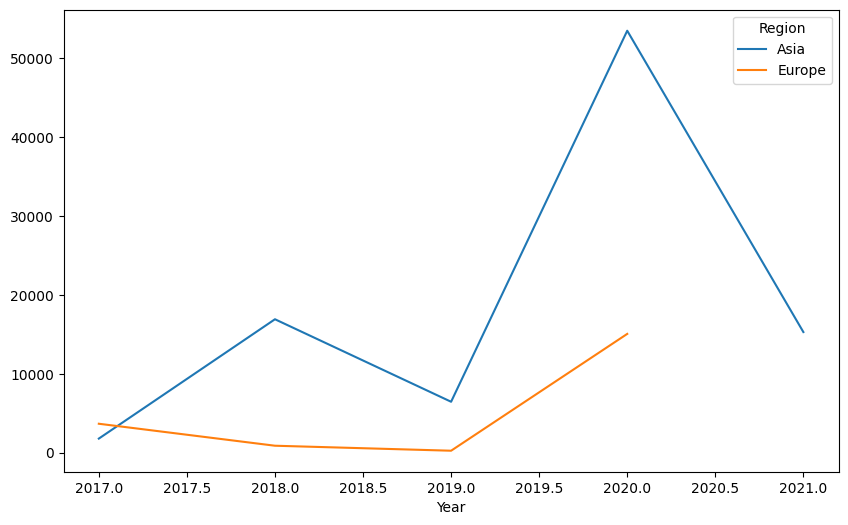

In [72]:
df4_unstacked.plot(kind = "line",figsize = (10,6))

In [73]:
# we need to convert the years to strings but before strings we need to convert to integer first
df4_unstacked.index = df4_unstacked.index.astype(int).astype(str)

In [74]:
home_data

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


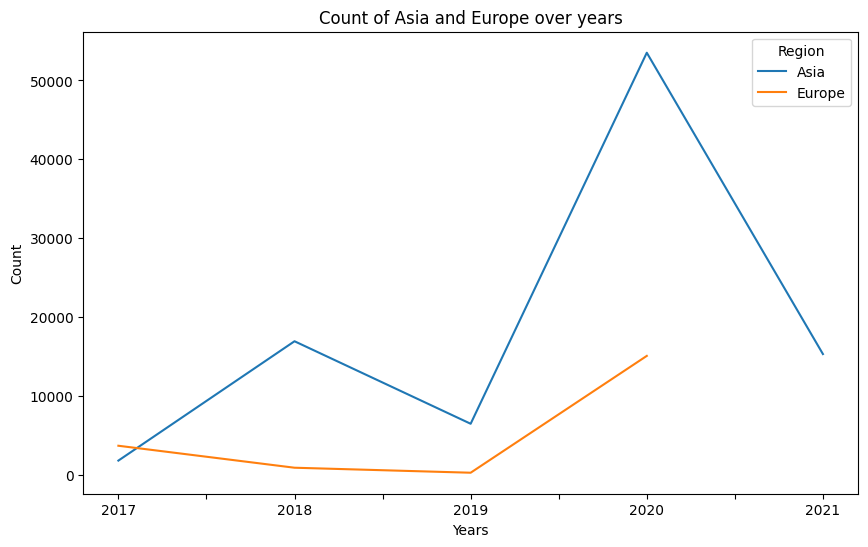

In [75]:
# then we can plot again
df4_unstacked.plot(kind = "line",figsize = (10,6))
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Count of Asia and Europe over years")
plt.show()

In [76]:
# sorting out years with rate in descending order
df5 = home_data.groupby(["Year"])['Rate'].sum().sort_values(ascending =False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

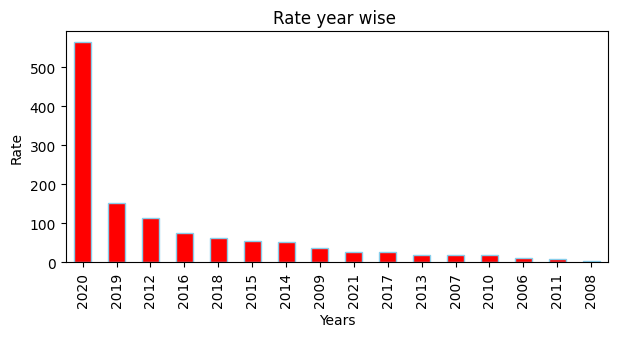

In [77]:
# ploting 
df5.plot(kind = "bar",figsize = (7,3),color = 'red',edgecolor = "skyblue")
plt.xlabel('Years')
plt.ylabel('Rate')
plt.title("Rate year wise ")
plt.show()

In [78]:
# picking out Regions in each year with their counts
df6 = home_data[['Year','Region','Count']]
df6 = df6.groupby(['Year','Region']).sum().sort_values(by = "Year",ascending = False).head(40)
df6

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Europe        15066
     Asia          53516
     Africa        28460
2019 Europe          249
     Africa        44210
     Asia           6458
     N/S America    4276
     Oceania         126
2018 N/S America   13793
     Europe          883
     Asia          16923
2017 Europe         3670
     Asia           1787
     Africa         1467
2016 Asia            627
     N/S America     608
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 N/S America      13
     Asia           3029
2013 Asia           5782
2012 Africa        15264
     N/S America      53
     Asia             61
2011 Asia           1626
     Africa          855
     Europe            0
2010 Europe            1
     Africa          303
2009 N/S America      42
     Africa           27
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2

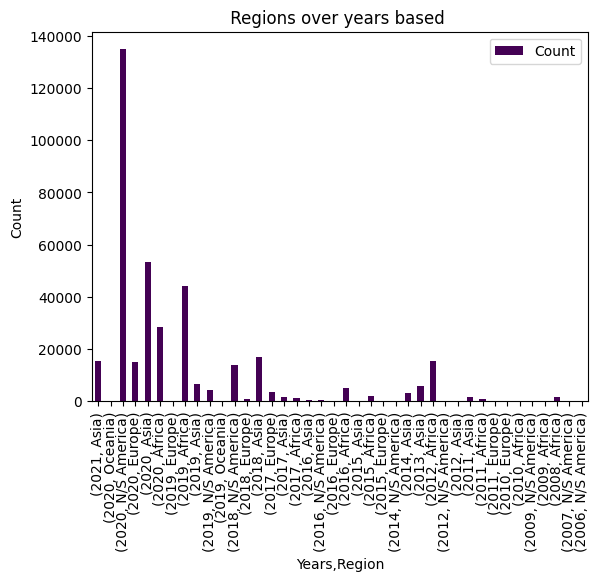

In [79]:
df6.plot(kind ='bar',colormap = 'viridis')
plt.xlabel('Years,Region')
plt.ylabel('Count')
plt.title(" Regions over years based  ")
plt.show()

In [80]:
df7 = home_data.groupby('Subregion')['Count'].mean().sort_values(ascending = False)
df7


Subregion
Southern Asia             6514.555556
South America             6067.076923
Central America           5921.375000
Northern America          4463.400000
Southern Africa           4295.800000
Western Africa            4210.727273
South-Eastern Asia        2531.400000
Eastern Africa            1577.933333
Eastern Europe            1460.400000
Eastern Asia              1223.285714
Northern Africa           1107.600000
Middle Africa              619.250000
Western Asia               581.900000
Central Asia               281.200000
Western Europe             230.555556
Caribbean                  201.480000
Australia, New Zealand     173.500000
Northern Europe            139.800000
Southern Europe             64.294118
Name: Count, dtype: float64

In [81]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [82]:
df7.values

array([6514.55555556, 6067.07692308, 5921.375     , 4463.4       ,
       4295.8       , 4210.72727273, 2531.4       , 1577.93333333,
       1460.4       , 1223.28571429, 1107.6       ,  619.25      ,
        581.9       ,  281.2       ,  230.55555556,  201.48      ,
        173.5       ,  139.8       ,   64.29411765])

In [83]:
data = {
    'Category':df7.index,
    'Value': df7.values,
    'info':df7.values
    
}
df = pd.DataFrame(data)
df


,Category,Value,info
0,Southern Asia,6514.555556,6514.555556
1,South America,6067.076923,6067.076923
2,Central America,5921.375000,5921.375000
3,Northern America,4463.400000,4463.400000
4,Southern Africa,4295.800000,4295.800000
5,Western Africa,4210.727273,4210.727273
6,South-Eastern Asia,2531.400000,2531.400000
7,Eastern Africa,1577.933333,1577.933333
8,Eastern Europe,1460.400000,1460.400000
9,Eastern Asia,1223.285714,1223.285714


In [84]:
'''fig = px.treemap(df,path =['Category'],values = 'Value' ,title = "Tree Map")
# you can as well update the template or also leave it as it is 
fig.update('hovertemplate = 'Category : %{label}<br> value:%{value}')
fig.show()'''
fig = px.treemap(df, path=['Category'], values='Value', title="Tree Map")

# Updating  the hover template
fig.update_traces(hovertemplate='Category: %{label}<br>Value: %{value}')

# Display the figure
fig.show()
